# Re-merge and collapse duplicates by compound ID
- Sometimes the data downloaded from HiTS by "compare checked assays" is not formatted well
- This notebook will walk through the steps of picking apart the data, collapsing duplicates by taking the max or average, and then merging each set together into a nicer dataframe.

## How to use this notebook:
1. Your input file will be a csv downloaded from HiTS with two or more assay data columns using the `compare checked assays showing useful data` link. An example file can be downloaded [here]()
2. Upload your file to the colab instance
  - Click the folder icon on the left toolbar then drag your input file into the folder area
5. Replace the example path with your file's path
  - Right click on your file and click "copy path"
  - make sure it's enclosed in quotes when you paste it
6. Run the fucntion to create your Echo and SPR input files
  - click the round circle with arrow next to the cell or hit shift+enter when your cursor is anywhere in the cell
7. Download the saved files locally
  - All files will be deleted shortly after you close the notebook instance
  - If you can't see the new files, click the refresh folder icon at the top of the folder area

### import packages

In [2]:
import pandas as pd

### load and prepare data

In [3]:
# %%time
# !git clone https://github.com/Small-Molecule-Discovery-Center/smdc_process_data.git
# import sys
# sys.path.append('/content/smdc_process_data')

##################################
# # PASTE YOUR FILE NAME BELOW # #
##################################
file = "./data/1433sigma-2-assays-20240119-151400-20240130-174523.csv"
##################################

df=pd.read_csv(file, header=[0,1])
print(df.shape)
df.head(2)

(2000, 15)


,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,1433FLWT_apo_monophorescreen,1433sFLWT_ARAF214(15mer)_Tethering
,Compound,Alias,SMILES,Lot #,Lot Alias,Salt,Solvate,Vendor,PAINS,Bruns-Watson Demerit Score,Assay Count,Plate,Well,percentlabeled,percentlabeled
0,916848,NaN,CN(C)CCSSCCC(=O)NC1CCN(Cc2ccccc2)CC1,1,1.0,TFA,NaN,NaN,0,>100,1,SMDC-MPHORE-384-1-02-ECO1,A03,NaN,25
1,916928,NaN,NCCSSCCCC(=O)N1CCN(CC1)c2cccc(Cl)c2,1,81.0,TFA,NaN,NaN,0,>100,1,SMDC-MPHORE-384-1-02-ECO1,A04,NaN,4.4


In [4]:
# fix columns because of weird 2-row header
cols=[]
ind0=''
for i, ind in enumerate(df.columns.get_level_values(0)):
    if 'Unnamed' in ind:
        ind1=df.columns[i][1]
        cols.append((ind0,ind1))
    else:
        ind1=df.columns[i][1]
        cols.append(df.columns[i])
df.columns=pd.MultiIndex.from_tuples(cols)
df.columns=[y if x=='' else f'{x}_{y}' for x,y in df.columns]
df.head(2)

,Compound,Alias,SMILES,Lot #,Lot Alias,Salt,Solvate,Vendor,PAINS,Bruns-Watson Demerit Score,Assay Count,Plate,Well,1433FLWT_apo_monophorescreen_percentlabeled,1433sFLWT_ARAF214(15mer)_Tethering_percentlabeled
0,916848,NaN,CN(C)CCSSCCC(=O)NC1CCN(Cc2ccccc2)CC1,1,1.0,TFA,NaN,NaN,0,>100,1,SMDC-MPHORE-384-1-02-ECO1,A03,NaN,25
1,916928,NaN,NCCSSCCCC(=O)N1CCN(CC1)c2cccc(Cl)c2,1,81.0,TFA,NaN,NaN,0,>100,1,SMDC-MPHORE-384-1-02-ECO1,A04,NaN,4.4


### examine duplicates

In [5]:
df.Plate.unique()

array(['SMDC-MPHORE-384-1-02-ECO1', 'SMDC-MPHORE-384-1-02-PT01',
       'SMDC-MPHORE-384-2-02-ECO1', 'SMDC-MPHORE-384-2-02-PT01',
       'SMDC-MPHORE-384-3-02-ECO1', 'SMDC-MPHORE-384-3-02-PT01',
       'SMDC-MPHORE-384-4-02-ECO1'], dtype=object)

In [6]:
# find some duplicates
counts=pd.DataFrame(df.Compound.value_counts())
counts[counts['count']==3]

,count
Compound,
917558,3
917584,3
917585,3
917577,3
917554,3
917556,3
917581,3
917622,3
917564,3


<Axes: >

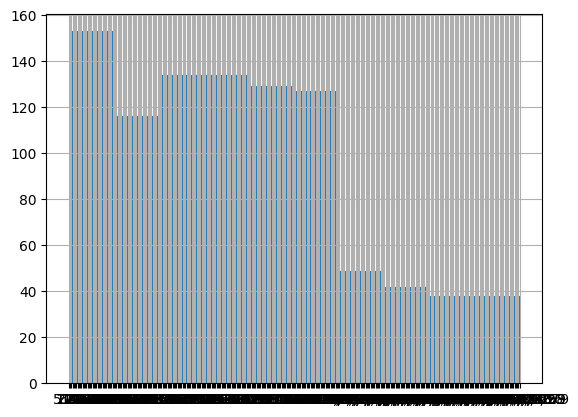

In [8]:
df['1433FLWT_apo_monophorescreen_percentlabeled'].hist()

In [57]:
# get rid of lot columns because we want info on every compound, not every lot
lot_cols=['Lot #', 'Lot Alias','Plate','Well']
df=df.drop(columns=lot_cols)
df.head(2)

,Compound,Alias,SMILES,Salt,Solvate,Vendor,PAINS,Bruns-Watson Demerit Score,Assay Count,assay_1_percentlabeled,assay_2_percentlabeled
0,917949,NaN,CN(C)CCSSCCNC(=O)C1CCN(CC1)C(=O)C(C)(C)Oc2ccc(...,TFA,NaN,NaN,0,>100,1,NaN,64.6
1,917007,NaN,CN(C)CCSSCCC(=O)Nc1cc(Cl)ccc1O,TFA,NaN,NaN,0,>100,1,NaN,58.9
